**Workflow :**

1. Data Preprocessing 
2. Data Analysis :  Selecting the features 
3. Split Data : train_test_split
4. XGBoostRegression Algorithm
5. Evaluation


In [3]:
#Importing Dependecies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics

#Boston house prices dataset Description


**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibilit
y to radial highways

**TAX** full-value property-tax rate per $10,000

**PTRATIO** pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

**LSTAT** % lower status of the population

**MEDV** Median value of owner-occupied homes in $1000’s

In [ ]:
#Importing the Boston House Price DataSet
house_price_dataset = sklearn.datasets.load_boston()
print(house_price_dataset)

In [8]:
#Loading into PD_DataFrame 
hp_data_frame = pd.DataFrame(house_price_dataset.data,columns =house_price_dataset.feature_names) 

In [12]:
# add target to dataFrame 
hp_data_frame['Price'] = house_price_dataset.target

In [13]:
hp_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
hp_data_frame.shape

(506, 14)

In [16]:
#Checking Missing Values
hp_data_frame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [18]:
hp_data_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
#Correlation between different features in the dataset
#Two types : Postive/Negative Correlation
correlation = hp_data_frame.corr()

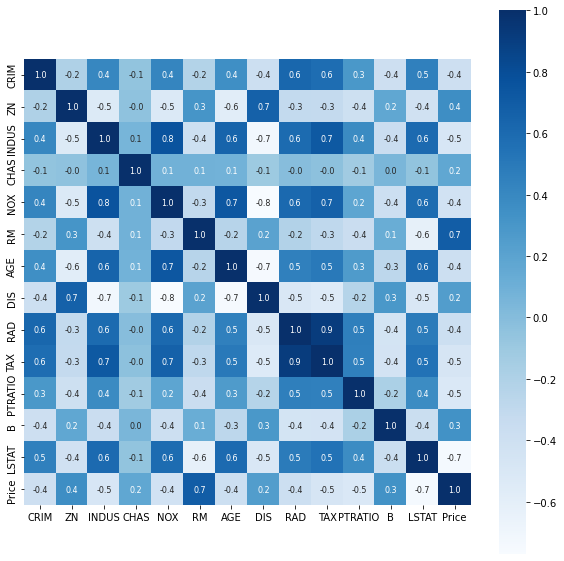

In [20]:
#Constructing a heatMap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Blues")

In [21]:
#Splitting Data and Target 
X = hp_data_frame.drop(columns=['Price'],axis = 1 )
Y = hp_data_frame['Price']

In [ ]:
print(X,Y)

In [24]:
#Split into Train/Test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=2)

#Stratify param in train_test_split ??
# is used while we are working with classification problems so that we have an equal
# proportion of classes in training data as well as test data.
# as this is a Regression problem, we shouldn't use it.

In [26]:
#Model Training 
model = XGBRegressor()
model.fit(X_train,Y_train)

[12:15:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [33]:
#Evaluating Predictions On Training Data
predictions_on_train_data = model.predict(X_train)
# With R squared Eroor 
score_r2 = metrics.r2_score(Y_train,predictions_on_train_data)
print("R2 Score :" + str(score_r2))
#Mean Absolute Error
score_mae = metrics.mean_absolute_error(Y_train,predictions_on_train_data)
print("MAE Score :" + str(score_mae))

R2 Score :0.9733349094832763
MAE Score :1.145314053261634


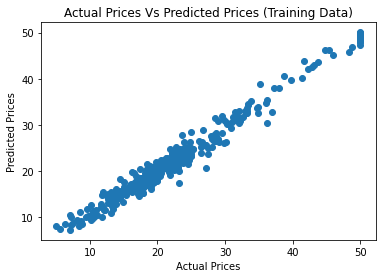

In [36]:
#Visualizing the Actual/Predicted Prices
plt.scatter(Y_train,predictions_on_train_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices (Training Data)")
plt.show()

In [35]:
#Evaluating Predictions On Test Data
predictions_on_test_data = model.predict(X_test)
# With R squared Eroor 
score_r2 = metrics.r2_score(Y_test,predictions_on_test_data)
print("R2 Score :" + str(score_r2))
#Mean Absolute Error
score_mae = metrics.mean_absolute_error(Y_test,predictions_on_test_data)
print("MAE Score :" + str(score_mae))

R2 Score :0.9115937697657654
MAE Score :1.9922956859364223


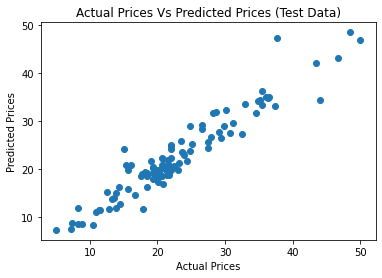

In [37]:
#Visualizing the Actual/Predicted Prices
plt.scatter(Y_test,predictions_on_test_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices (Test Data)")
plt.show()